In [1]:
%%html
<style>
    table {
        display: inline-block
    }
</style>


# 项目：调查 TMDB 电影数据集

## 目录
<ul>
<li><a href="#intro">简介</a></li>
<li><a href="#wrangling">数据整理</a></li>
<li><a href="#eda">探索性数据分析</a></li>
<li><a href="#conclusions">结论</a></li>
</ul>

<a id='intro'></a>
## 简介

该电影数据由 [kaggle](https://www.kaggle.com/tmdb/tmdb-movie-metadata) 提供。

###  TMDB 电影数据的属性说明：


| 属性        | 描述           |
| :---------  | :------------ |
| id          |   序号 |
| imdb_id      | IMDB 序号      |
| popularity | 欢迎度    |
| budget | 影片预算    |
| revenue | 票房收入      |
| original_title | 原始片名（未翻译过的）|
| cast | 主要演员表  |
| homepage | 影片主页      |
| director | 导演      |
| tagline | 标语   |
| keywords | 影片关键词  |
| overview | 剧情简介  |
| runtime | 影片时长（分钟）  |
| genres | 影片类型  |
| production_companies | 影片发行公司  |
| vote_count | 评分总人数    |
| vote_average | 平均得分（满分 10） |
| release_year | 发行年代      |
| budget_adj | 影片预算（调整）  |
| revenue_adj | 票房收入（调整） |

### 针对该 TMDB 电影数据集希望探索的问题：
<ol>
<li><a href="#pop_of_each_year">总体上看，最受欢迎的电影类别是哪些？</a></li>
<li><a href="#characteristics_of_high_revenue_movies">票房高的电影有哪些特点？</a></li>
</ol>


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

<a id='wrangling'></a>
## 数据整理


### 常规属性

In [3]:
df = pd.read_csv("tmdb-movies.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [4]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


### 清理数据中的缺失项

- 删除 homepage 列 - 含有太多缺失项目，且不影响之后的数据分析
- 删除 tagline（标语）列 - 含有过多缺失项目，且不影响之后的数据分析
- 删除 keywords（影片关键词）列 - 含有过多缺失项目，且不影响之后的数据分析
- 抛弃 imdb 序号（imdb_id）一项缺失的行（row）
- 抛弃演员表（cast）一项缺失的行（row）
- 抛弃导演（director）一项缺失的行（row）
- 抛弃简介（overview）一项缺失的行（row）
- 抛弃类别（genres）一项缺失的行（row）
- 抛弃发行公司（production_companies）一项缺失的行（row）

In [5]:
# 清理缺失项
df_edited = df.drop(["homepage", "tagline", "keywords"], axis=1)
df_edited.dropna(inplace=True)

### 清理数据中的异常值

- 【清理 runtime 列带异常值的行】- 影片时长（runtime）一列的最小值存在 0 分钟，这对电影来说是不合理的（最大值 900 分钟的影片 The Story of Film: An Odyssey 确实存在，它其实是一个季度的电视剧的，60分钟一集，共15集，所以最大值合理）
- 【清理 budget 列带异常值的行】 - 影片拍摄预算（budget）一列的 0 元异常值过多
- 【清理 budget_adj 列带异常值的行】 - 调整后的影片拍摄预算（budget_adj）一列的 0 元异常值过多
- 【清理 revenue 列带异常值的行】 - 票房收入（revenue）一列的 0 元异常值过多
- 【清理 revenue_adj 列带异常值的行】 - 调整后的票房收入（revenue_adj）一列的 0 元异常值过多

In [6]:
# 清理异常值
def clean_outlier_rows(df, column_name, outlier_value):
    return df.drop(index=df[df[column_name] < (outlier_value +1)].index)

column_names = ["runtime", "budget", "budget_adj", "revenue", "revenue_adj"]

for name in column_names:
    df_edited = clean_outlier_rows(df_edited, name, 0)

### 调整数据中的部分数据类型

- 将 release_date 列的数据类型变更为 datetime

In [7]:
# 调整数据类型
df_edited["release_date"] = pd.to_datetime(df_edited["release_date"])

In [8]:
# 检测任何列是否有空值 - 返回 False 则没有空值，返回 True 则存在空值
df_edited.isnull().sum().any()

False

In [9]:
df_edited.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,3805.000000,3805.000000,3.805000e+03,3.805000e+03,3805.000000,3805.000000,3805.000000,3805.000000,3.805000e+03,3.805000e+03
mean,40035.878055,1.203804,3.761588e+07,1.089736e+08,109.351643,534.173456,6.170486,2001.228909,4.472765e+07,1.387162e+08
std,67584.996392,1.480560,4.231758e+07,1.772974e+08,19.845191,883.750199,0.792538,11.329400,4.488175e+07,2.169971e+08
min,5.000000,0.010335,1.000000e+00,2.000000e+00,15.000000,10.000000,2.200000,1960.000000,1.309053e+00,2.370705e+00
25%,5925.000000,0.470651,1.000000e+07,1.433379e+07,96.000000,74.000000,5.700000,1995.000000,1.354637e+07,1.925371e+07
50%,11253.000000,0.810805,2.500000e+07,4.621664e+07,106.000000,209.000000,6.200000,2004.000000,3.038360e+07,6.284688e+07
75%,38579.000000,1.387163,5.000000e+07,1.260695e+08,119.000000,584.000000,6.700000,2010.000000,6.084153e+07,1.658054e+08
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,338.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


<a id='eda'></a>
## 探索性数据分析


<a id='pop_of_each_year'></a>
> ### 总体上看，最受欢迎的电影类别是哪些？

In [10]:
# 定义一个函数，用于将带有 "|" 的字符串分割生成 list，并将这些 lists 合成一个 Series
def combine_lists(series_of_lists):
    return series_of_lists.apply(lambda x: pd.Series(x.split("|"))).stack().reset_index(drop=True)

In [11]:
# 获取欢迎度（popularity）排名前 100 的电影
top_pop_index = df_edited["popularity"].nlargest(100).index
top_100_pop_df = df_edited.loc[top_pop_index]

# 收集欢迎度（popularity）排名前 100 的电影类型（Genres）
genres_collected = combine_lists(top_100_pop_df["genres"])

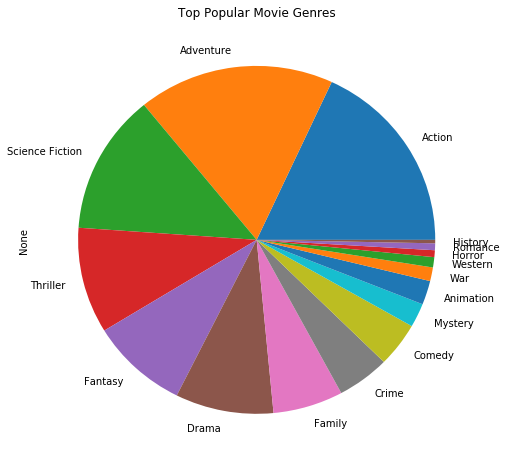

In [12]:
# 绘图 - 显示欢迎度（popularity）排名前 100 的电影在各个类型（Genres）的数量分布
genre_movie_counts = genres_collected.value_counts()
labels = list(genre_movie_counts.index)
genre_movie_counts.plot(kind="pie", title="Top Popular Movie Genres", figsize=(8, 8));

根据上面的柱状图，很容易看出，这个数据集合里所记录的所有电影里，最受欢迎的电影类别是 Action，Adventure，Science Fiction，Thriller，Fantasy，Drama，Family，Crime 和 Comedy

<a id='characteristics_of_high_revenue_movies'></a>
>### 票房（Adjusted Revenue）高的电影有哪些特点？

In [13]:
# 获取票房（revenue_adj）排名前 100 名的电影
top_reve_index = df_edited["revenue_adj"].nlargest(100).index
top_100_reve_df = df_edited.loc[top_reve_index]

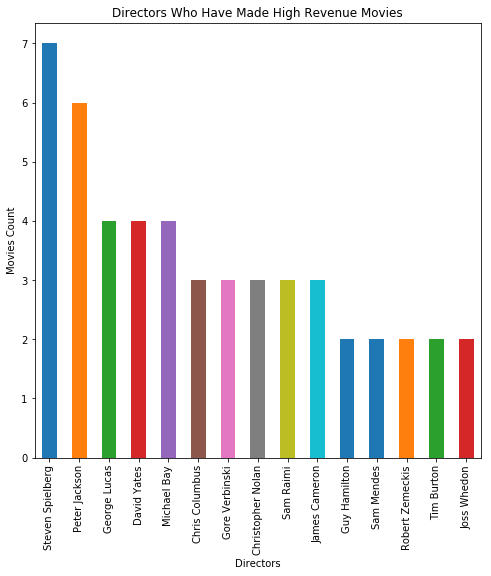

In [14]:
# 绘图 - 显示排名前 100 的高票房（High Adjusted Revenue）电影中，各个导演（Director）所拍的数量
director_movie_count = top_100_reve_df["director"].value_counts()
movie_count = director_movie_count.nlargest(15)
labels = list(movie_count.index)
movie_count.plot(kind="bar", title="Directors Who Have Made High Revenue Movies", figsize=(8, 8));
plt.xlabel('Directors')
plt.ylabel('Movies Count');

>特点一：排名前 100 的高票房电影里经常能看到 Steven Spielberg 和 Peter Jackson 这两位导演的身影（他们贡献了超过 10% 的高票房电影）

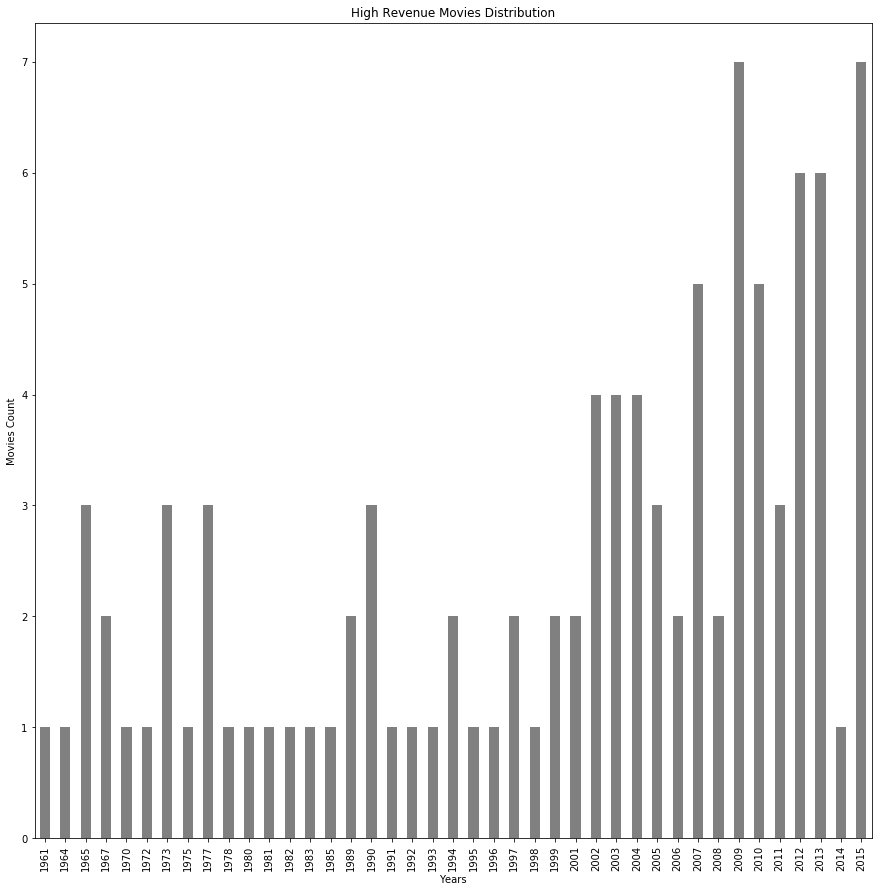

In [15]:
# 绘图 - 显示排名前 100 的高票房（High Adjusted Revenue）电影在各个年份的数量
top_100_reve_df["release_year"].value_counts().sort_index().plot(kind="bar", title="High Revenue Movies Distribution", figsize=(15, 15), color='grey');
plt.xlabel('Years')
plt.ylabel('Movies Count');

>特点二：排名前 100 的高票房电影集中在 2002 年到 2015 年，其中 2009 年和 2015 年这两年的高票房电影数量最多

In [16]:
# 收集排名前 100 的高票房（High Adjusted Revenue）电影的主演（Cast）名单
cast_collected = combine_lists(top_100_reve_df["cast"])
cast_movie_count = cast_collected.value_counts()

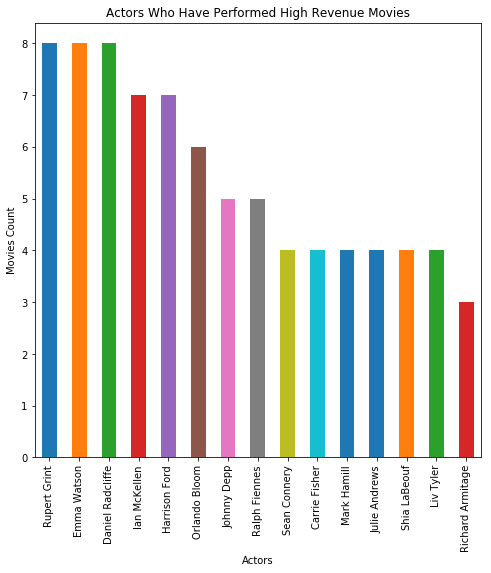

In [17]:
# 绘图 - 显示欢迎度（popularity）排名前 100 的电影在各个类型（Genres）的数量分布
movie_count = cast_movie_count.nlargest(15)
labels = list(movie_count.index)
movie_count.plot(kind="bar", title="Actors Who Have Performed High Revenue Movies", figsize=(8, 8));
plt.xlabel('Actors')
plt.ylabel('Movies Count');

>特点三：排名前 100 的高票房电影里，经常能看到 Daniel Radcliffe，Rupert Grint，Emma Watson，Harrison Ford，Ian McKellen，Orlando Bloom，Ralph Fiennes，Johnny Depp，Mark Hamill 和 Liv Tyler 这些演员的身影。不过仔细观察可以发现某些演员是因为一个系列拍了 8 部才因此霸榜，考虑到这些电影系列的故事比较火，所以当前无法判断演员本身对高票房有多大的贡献。

In [18]:
# 收集排名前 100 的高票房（High Adjusted Revenue）电影的制片公司（Production Companies）名单
companies_collected = combine_lists(top_100_reve_df["production_companies"])
companies_movie_count = companies_collected.value_counts()

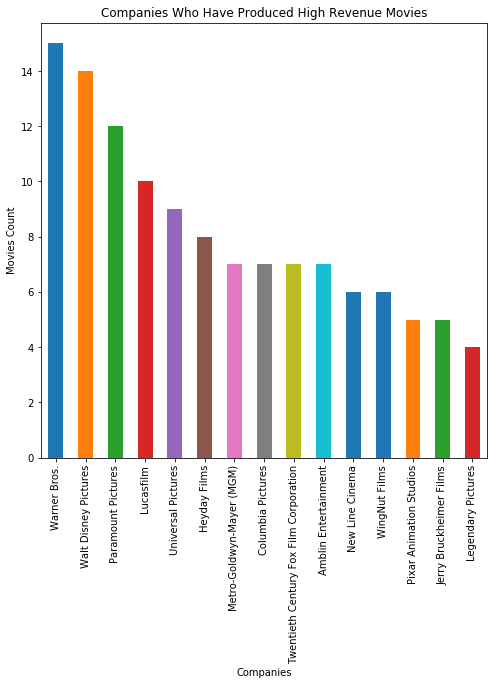

In [19]:
# 绘图 - 显示欢迎度（popularity）排名前 100 的电影在各个类型（Genres）的数量分布
movie_count = companies_movie_count.nlargest(15)
labels = list(movie_count.index)
movie_count.plot(kind="bar", title="Companies Who Have Produced High Revenue Movies", figsize=(8, 8));
plt.xlabel('Companies')
plt.ylabel('Movies Count');

>特点四：排名前 100 的高票房电影里，经常能看到 Warner Bros.，Walt Disney Pictures，Paramount Pictures，Lucasfilm，Universal Pictures 和 Heyday Films 这些公司的身影。

<a id='conclusions'></a>
## 结论

### 结论一：
> 总体上看，最受欢迎的电影类别是 Action，Adventure，Science Fiction，Thriller，Fantasy，Drama，Family，Crime 和 Comedy 。当然，这只是初步的统计，更详细的情况还需要进一步分析。比如今年观众喜欢的类型也许会变化，可能需要进一步分析每个年份受欢迎的类型分别是什么，尤其是最近的几年，才能知道当前，甚至未来，什么类型的电影最受欢迎。

### 结论二：
>   票房高的电影有哪些特点如下：
- 特点一：排名前 100 的高票房电影里经常能看到 Steven Spielberg 和 Peter Jackson 这两位导演的身影（他们贡献了超过 10% 的高票房电影）；
- 特点二：排名前 100 的高票房电影集中在 2002 年到 2015 年，其中 2009 年和 2015 年这两年的高票房电影数量最多；
- 特点三：排名前 100 的高票房电影里，经常能看到 Daniel Radcliffe，Rupert Grint，Emma Watson，Harrison Ford，Ian McKellen，Orlando Bloom，Ralph Fiennes，Johnny Depp，Mark Hamill 和 Liv Tyler 这些演员的身影。不过仔细观察可以发现某些演员是因为一个系列拍了 8 部才因此霸榜，考虑到这些电影系列的故事比较火，所以需要进一步分析才能判断演员本身，和系列故事的剧本等因素，分别对高票房有多大的贡献；
- 特点四：排名前 100 的高票房电影里，经常能看到 Warner Bros.，Walt Disney Pictures，Paramount Pictures，Lucasfilm，Universal Pictures 和 Heyday Films 这些公司的身影；

## 分析总结：
> 1. 以上的数据探索了特征之间的相互关系，并不涉及因果；
2. 以上的数据在分析时进行过异常值，缺失值的清理，导致用以探索分析的整个数据量缩小到了原始数据的 35% （1万多条数据变为3千8百多条），由这个 35% 的子集得出的观点，需要进一步的分析才能更加令人信服；
3. 处理异常值和缺失值之前的数据，和处理之后的数据，两者所得到的结论有微小的差异（体现在排名先后），但就本次探索的两个问题来说，总体上差异不大；

参考资料：
1. [align jupyter notebook tables to the left](https://stackoverflow.com/questions/45354207/align-jupyter-notebook-tables-to-the-left)
2. [Pandas Series of lists to one series](https://stackoverflow.com/questions/30885005/pandas-series-of-lists-to-one-series)
3. [pandas.DataFrame.stack](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.stack.html)
4. [pandas.Series.sort_index](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.sort_index.html)

In [20]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset_twentynight_p3.ipynb'])

0